In [66]:
import torch

torch.__version__

'2.8.0+cpu'

In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data", path="loan_data.csv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\himan\.cache\kagglehub\datasets\taweilo\loan-approval-classification-data\versions\1\loan_data.csv


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# load the data

df = pd.read_csv(path)

df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [70]:
# check for missing values

df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [71]:
# check for duplicates

df.duplicated().sum()

np.int64(0)

## EDA

In [72]:
# dtypes of columns

df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [73]:
# separate the numerical and categorical data

numerical_data = df.select_dtypes(include=np.number)

categorical_data = df.select_dtypes(exclude=np.number)

In [74]:
numerical_data

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


In [75]:
# statistical summary for numerical data

numerical_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [76]:
categorical_data.describe()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [77]:
# numerical columns in data

num_cols = numerical_data.columns[0:-1].tolist()

num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [78]:
from matplotlib.gridspec import GridSpec

In [79]:
def plots_for_num_cols(numerical_col):
    plt.figure(figsize=(12,4))
    grid = GridSpec(nrows=1, ncols=4)
    
    # set the axes
    # boxplot
    ax1 = plt.subplot(grid[:,0])
    # histogram
    ax2 = plt.subplot(grid[:,1:3])
    # violin plot
    ax3 = plt.subplot(grid[:,3])
    
    # create boxplot
    sns.boxplot(data=df, y=numerical_col,ax=ax1)
    # create histogram
    sns.histplot(data=df,x=numerical_col,ax=ax2)
    # create violin plot
    sns.violinplot(data=df,y=numerical_col,ax=ax3)
    plt.tight_layout()
    plt.show()

PERSON_AGE


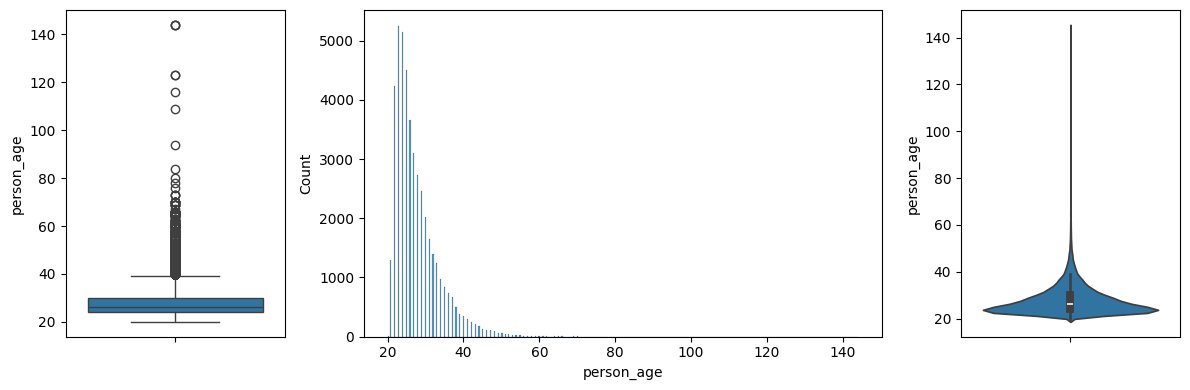


PERSON_INCOME


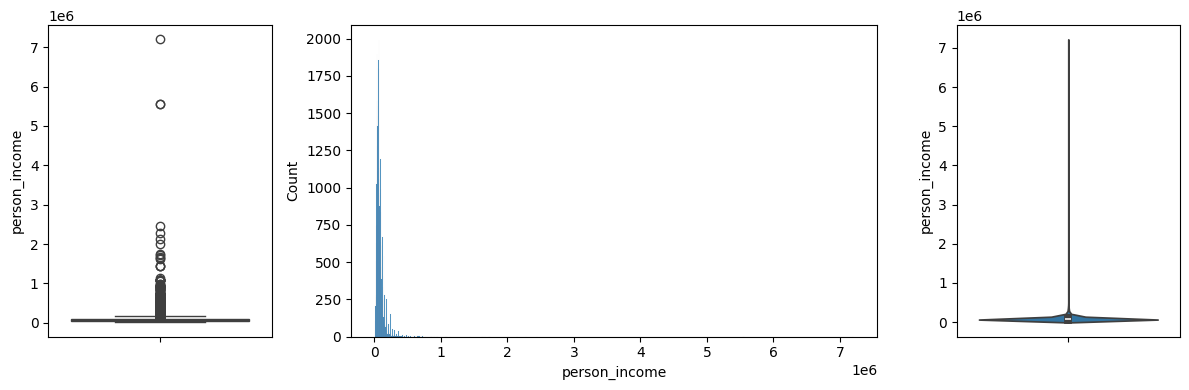


PERSON_EMP_EXP


In [ ]:
for col in num_cols:
    print(f"{col.upper()}")
    plots_for_num_cols(col)
    print()

In [ ]:
def plots_for_cat_cols(column_name):
    print(f"Number of unique values in {column_name}: {df[column_name].nunique()}", end="\n\n")
    print(f"Unique values in {column_name}: {df[column_name].unique()}", end="\n\n")
    display(df[column_name].value_counts(normalize=True))
    sns.countplot(data=df, x=column_name)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
numerical_data.columns[[-1]].tolist()

In [ ]:
cat_cols = categorical_data.columns.tolist() + numerical_data.columns[[-1]].tolist() 

cat_cols

In [ ]:
for col in cat_cols:
    plots_for_cat_cols(col)

## FE

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split

In [ ]:
df.columns[-1]

In [ ]:
# make X and y

X, y = df.drop(columns=["loan_status"]), df['loan_status']

In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, 
                                                    random_state=42, stratify=y,
                                                    shuffle=True)

print("shape of training data is ", X_train.shape)
print("shape of test data is ", X_test.shape)


In [ ]:
num_cols

In [ ]:
cat_cols.pop(-1)

In [ ]:
cat_cols

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# pipeline for numerical column
# 1. Outlier Capping
# 2. Scaling --> Robust Scaler

num_pipe = Pipeline(steps=[
    ("outlier", Winsorizer(capping_method="iqr", tail="both", fold=1.5)),
    ("scaling", RobustScaler())
])

num_pipe

In [ ]:
cat_cols.pop(1)

In [ ]:
ohe_cols = cat_cols

In [ ]:
order_of_education = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

In [ ]:
# transformer object
# 1. OHE
# 2. Num pipe  
# 3. Ordinal encode --> education

preprocessor = ColumnTransformer(transformers=[
    ("num_pipe", num_pipe, num_cols),
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"), ohe_cols),
    ("ordinal", OrdinalEncoder(categories=[order_of_education], handle_unknown="use_encoded_value",
                               unknown_value=-1), ["person_education"])
], remainder="passthrough", n_jobs=-1, verbose_feature_names_out=False)

preprocessor

In [ ]:
X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

In [ ]:
# feature names

feature_names = preprocessor.get_feature_names_out()

feature_names

In [ ]:
feature_names.shape

In [ ]:
X_train

## Model Building

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

### Build the Dataset

In [ ]:
y_train.values

In [ ]:
# create a Dataset class

class LoanDataset(Dataset):
    
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).to(torch.float32)
        self.y = torch.from_numpy(y.values).to(torch.float)
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        row, label = self.X[idx], self.y[idx]
        return row, label

In [ ]:
temp_dataset = LoanDataset(X_train[:10],y_train.iloc[:10])

temp_dataset

In [ ]:
len(temp_dataset)

In [ ]:
temp_dataset[0]

In [ ]:
X_train[0], y_train.iloc[0]

In [ ]:
# define the datasets

train_dataset = LoanDataset(X_train, y_train)
test_dataset = LoanDataset(X_test, y_test)

In [ ]:
# define the dataloader

train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [ ]:
for batch_features, batch_label in train_dataloader:
    print(batch_features)
    print(batch_features.shape)
    print(batch_label)
    print(batch_label.shape)
    
    break

### Model Arch

In [ ]:
# create the model

class MyModel(nn.Module):
    
    def __init__(self, num_features):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()           
        )
        
    def forward(self, X):
        predictions = self.network(X)
        return predictions

In [ ]:
# define the model

model = MyModel(num_features=X_train.shape[1])

In [ ]:
model

In [ ]:
# set the epochs and lr

epochs = 30
lr = 0.001

In [ ]:
from torch.optim import Adam

In [ ]:
# set the optimizer
optimizer = Adam(params=model.parameters(), lr=lr)

In [ ]:
# set our loss function

loss_fn = nn.BCELoss()

In [ ]:
len(train_dataloader)

In [ ]:
for batch_features_train, batch_labels_train in train_dataloader:
    print("Input: ", batch_features_train.shape)  
    # forward pass
    y_pred_train = model(batch_features_train)
    print("Predictions: ", y_pred_train.shape)
    print(y_pred_train[0:3])
    print("Labels: ", batch_labels_train.unsqueeze(1).shape)
    
    break

In [ ]:
# training loop

train_batches = len(train_dataloader)
test_batches = len(test_dataloader)

# iterate over all the epochs
for epoch in range(1, epochs+1):
    train_loss = 0
    test_loss = 0
    
    # iterate over the batches of training data
    for batch_features_train, batch_labels_train in train_dataloader:
        
        # forward pass
        y_pred_train = model(batch_features_train)
        
        # calculate the loss
        batch_loss_train = loss_fn(y_pred_train, batch_labels_train.unsqueeze(1))
        
        # clear the gradients
        optimizer.zero_grad()
        
        # calculate the gradients using backprop
        batch_loss_train.backward()
        
        # update the model parameters
        optimizer.step()
        
        # add batch loss to epoch loss
        train_loss += batch_loss_train.item()
        
    # iterate over the batches of test data
    for batch_features_test, batch_labels_test in test_dataloader:
        with torch.no_grad():
            # forward pass
            y_pred_test = model(batch_features_test)
            
            # calculate the loss
            batch_loss_test = loss_fn(y_pred_test, batch_labels_test.unsqueeze(1))
            
            # add batch loss to epoch loss
            test_loss += batch_loss_test.item()
            
    avg_train_loss = train_loss / train_batches
    avg_test_loss = test_loss / test_batches
    
    print(f"Epoch: {epoch}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}")
        

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# model to be set to eval mode

model.eval()

In [ ]:
# define the dataloader

train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32,
                              shuffle=False)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [ ]:
# calculate the predictions on training data

train_predictions = []

for batch_features, batch_labels in train_dataloader:
    with torch.no_grad():
        y_pred = model(batch_features).squeeze(1).numpy()
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        train_predictions.extend(y_pred)
        
 
y_pred_train = np.array(train_predictions)   

In [ ]:
y_pred_train.shape, y_train.shape

In [ ]:
# calculate the predictions on test data

test_predictions = []

for batch_features, batch_labels in test_dataloader:
    with torch.no_grad():
        y_pred = model(batch_features).squeeze(1).numpy()
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        test_predictions.extend(y_pred)
        
 
y_pred_test = np.array(test_predictions)   

In [ ]:
y_pred_test.shape, y_test.shape

In [ ]:
# classifictaion report for training data

print(classification_report(y_train, y_pred_train))

In [ ]:
# classifictaion report for testdata

print(classification_report(y_test, y_pred_test))

## SHAP